# Temperature forecast

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. 

This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 

There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.
The problem is a regression problem


Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [227]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [228]:
df = pd.read_csv('temprature.csv')

In [229]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896   0.161697   0.130928    0.000000    0.000000   
1      0.225508   0.251771   0.159444   0.127727    0.000000    0.000000   
2      0.209344   0.257469   0.204091   0.142125    0.000000    0.000000   
3      0.216372   0.226002   0.161157   0.134249    0.000000    0.000000   
4      0.151407   0.249995   0.178892   0.170021    0.000000    0.000000   
...         ...        ...        ...        ...         ...         ...   
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8    

In [230]:
pd.set_option('display.max_columns', None)

In [231]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
0      0.233947   0.203896   0.161697   0.130928    0.000000    0.000000   
1      0.225508   0.251771   0.159444   0.127727    0.000000    0.000000   
2      0.209344   0.257469   0.204091   0.142125    0.000000    0.000000   
3      0.216372   0.226002   0.161157   0.134249    0.000000    0.000000   
4      0.151407   0.249995   0.178892   0.170021    0.000000    0.000000   
...         ...        ...        ...        ...         ...         ...   
7747   0.030034   0.081035   0.000000   0.000000    0.000000    0.000000   
7748   0.035874   0.074962   0.000000   0.000000    0.000000    0.000000   
7749   0.048954   0.059869   0.000000   0.000796    0.000000    0.000000   
7750   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
7751   0.967277   0.968353   0.983789   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0       0.000000    0.000000  37.6046  126.991  212.3350  2.785000   
1       0.000000    0.000000  37.6046  127.032   44.7624  0.514100   
2       0.000000    0.000000  37.5776  127.058   33.3068  0.266100   
3       0.000000    0.000000  37.6450  127.022   45.7160  2.534800   
4       0.000000    0.000000  37.5507  127.135   35.0380  0.505500   
...          ...         ...      ...      ...       ...       ...   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8    

### Observation

- The data set has 7752 rows and 25 columns, out of which, 2 are output columns.
- The complete data set has numerical data only, and no categorical data.

# Exploratory Data Analysis

In [232]:
#Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


### Observation

The data has all float values except date column, which would need treatment

In [233]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [234]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [235]:
#Checking data statistics

df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

### Observations

 - We have data with null values in columns -'station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin'
        
- We expect outliers in LDAPS_WS and LDAPS_LH columns, 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' columns, DEM, Slope columns since values in 75% and max values are having huge difference between them


In [236]:
# Splitting the Date column

df.Date = df.Date.str.split('-')

df['Day'] = df.Date.str[0]
df['Month'] = df.Date.str[1]
df['Year'] = df.Date.str[2]

In [237]:
df.drop('Date', axis = 1, inplace = True)

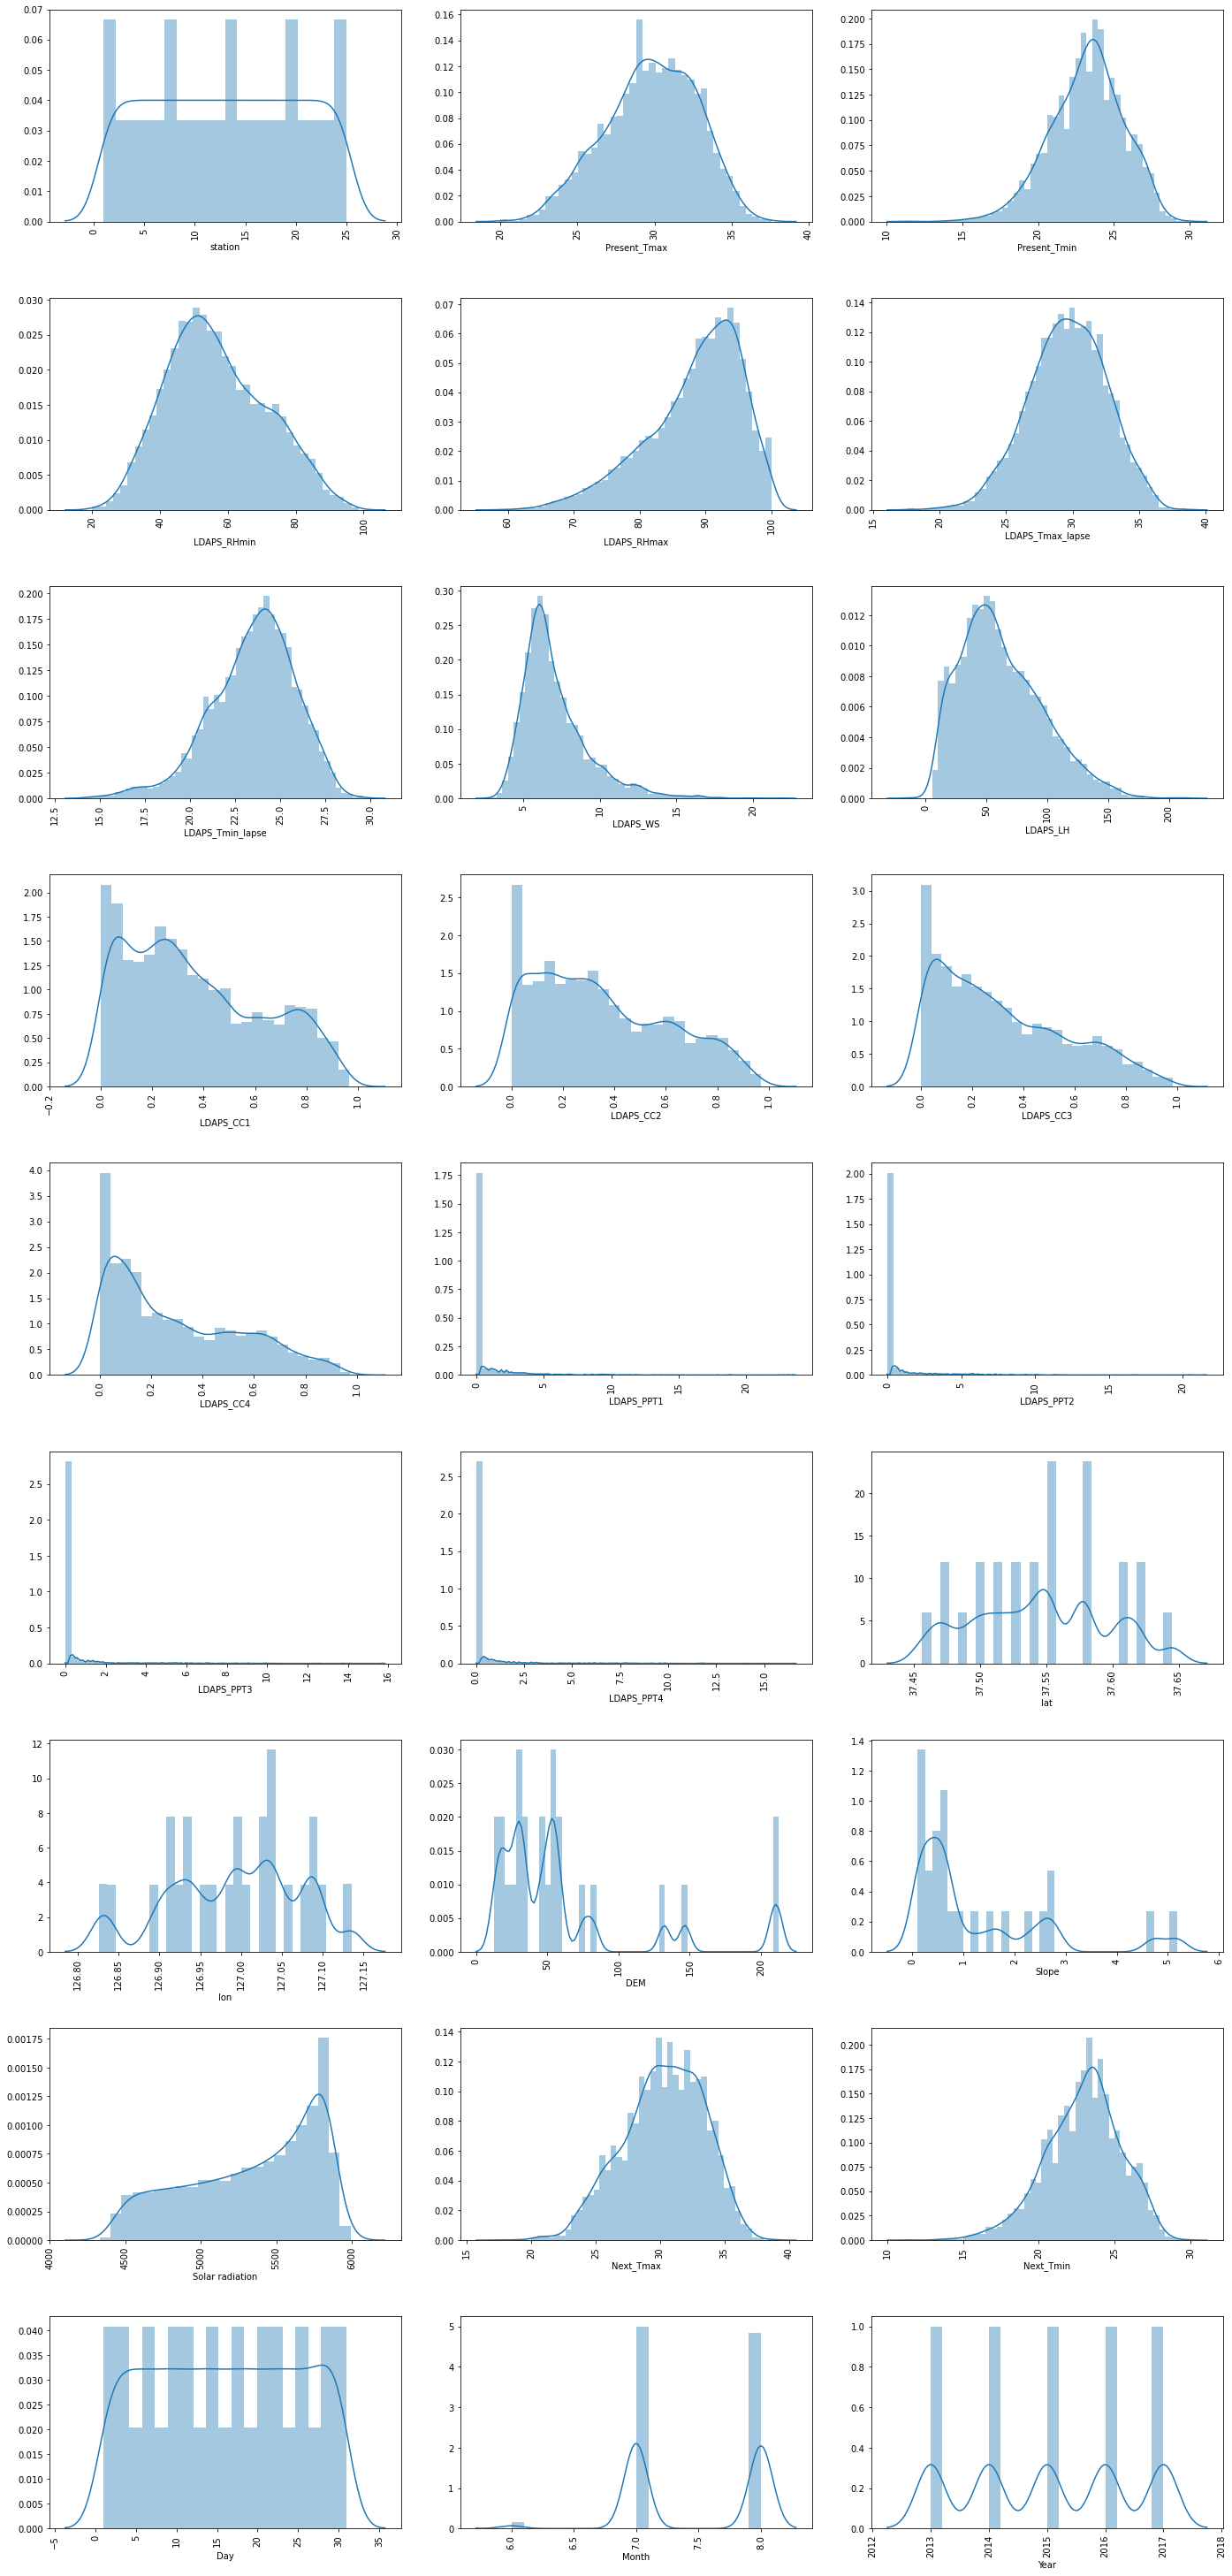

In [238]:
# Plotting the data

c=1
plt.figure(figsize=(20,45))

for i in df.columns:
    plt.subplot(10,3,c)
    sns.distplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Observations

- We observe slight left skewness in Present_Tmax, LDAPS_Tmax_Lapse, LDAPS_Tmin_Lapse data
- We observe moderate left skewness in Solar radiation , LDAPS_RHmax columns


- We observe right skewness in LDAPS_RHmin, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 columns
- We observe high skewness in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 columns, DEM, Slope columns

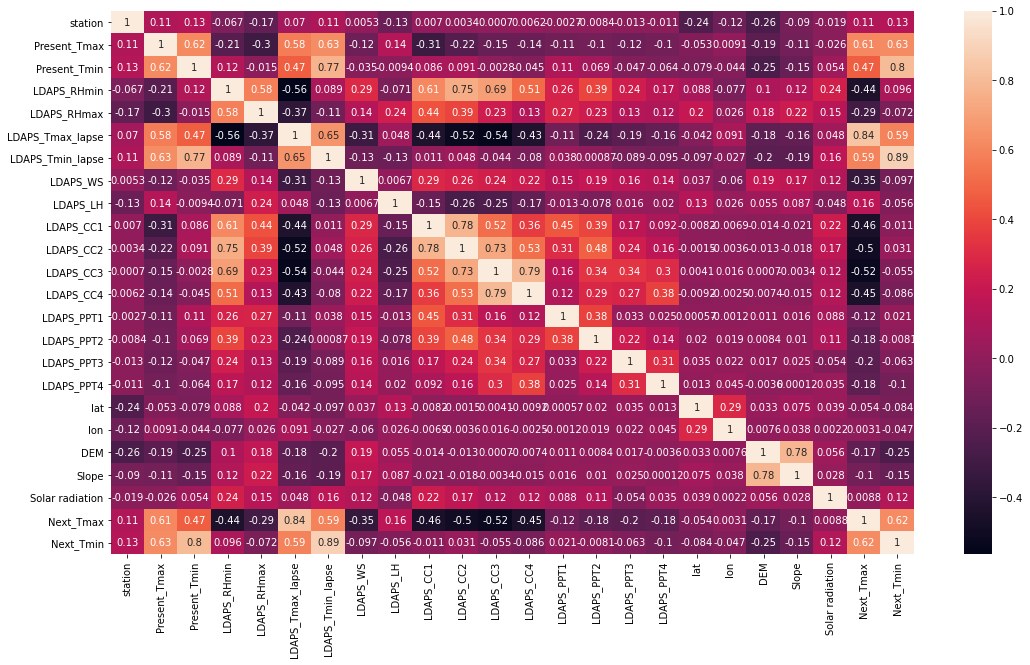

In [239]:
# Checking data correlations 

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True)

### Observations 

- Next_Tmax and Next_Tmin is highly correlated with Present_Tmax (~60% ) and moderately correlated with Present_Tmin (47% and 80%)
- Mext_Tmax is correlated with LDAPS_Tmax_lapse and LDAPS_Tmin_lapse (84 and 59% correlations)
- Next_Tmin is correlated with LDAPS_Tmax_lapse and LDAPS_Tmin_lapse (59 and 84% correlations)
- Next_Tmax and Next_Tmin is correlated with Next_Tmax and Next_Tmin with 11 and 13% correlations.
- We observe moderate correlations between LDAPS CC1, CC2, CC3, CC4 variables and LDAPS_PPT1, PPT2, PPT3 and PPT4 columns
- LDAPS-RHmin and LDAPS-RHmax is correlated with LDAPS CC1, CC2, CC3 and CC4 columns (RHmin variable has ~60% correlation and RHmax has ~40% correlations)

In [240]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [241]:
df[df.station.isnull()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN          20.0          11.3    19.794666    58.936283   
7751      NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
7750   0.000000   0.000000    0.00000    0.000000    0.000000    0.000000   
7751   0.968353   0.983789    0.97471   23.701544   21.621661   15.841235   

      LDAPS_PPT4      lat      lon      DEM     Slope  Solar radiation  \
7750    0.000000  37.4562  126.826   12.370  0.098475      4329.520508   
7751   16.655469  37.6450  127.135  212.335  5.178230      5992.895996   

      Next_Tmax  Next_Tmin  Day Month Year  
7750       17.4       11.3  NaN   NaN  NaN  
7751       38.9       29.8  NaN   NaN  NaN

In [242]:
df.station.value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

### Observation 

- The stations are equally distributed as 310 counts for all stations, hence we will drop the 2 rows, to maintain the distribution.

In [243]:
df.dropna(subset=['station'], axis = 0, inplace= True)

In [244]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin Day Month  Year  
0          29.1       21.2  30    06  2013  
1          30.5       22.5  30    06  2013  
2          31.1       23.9  30    06  2013  
3          31.7       24.3  30    06  2013  
4          31.2       22.5  30    06  2013  
...         ...        ...  ..   ...   ...  
7745       27.6       17.7  30    08  2017  
7746       28.0       17.1  30

In [245]:
#Checking missing values in Present_Tmax column

df[df['Present_Tmax'].isnull()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
225       1.0           NaN           NaN    70.051193    99.668961   
271      22.0           NaN           NaN    72.196007    95.168205   
300       1.0           NaN           NaN    95.027298    99.209839   
450       1.0           NaN           NaN    60.891193    94.747780   
464      15.0           NaN           NaN    52.795406    83.902847   
...       ...           ...           ...          ...          ...   
7579      5.0           NaN           NaN    38.403931    94.790405   
7596     22.0           NaN           NaN    33.681381    91.842178   
7605      6.0           NaN           NaN    24.100304    76.861076   
7629      5.0           NaN           NaN    43.755058    83.340240   
7707      8.0           NaN           NaN    44.392651    75.728195   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
225          27.872808         22.907420  11.017837   44.002020   0.890438   
271          28.097980         24.510159   8.374849   38.782242   0.796409   
300          24.078120         21.866817   8.543768    9.371270   0.857962   
450          29.195536         23.236973  10.881031   79.349271   0.392393   
464          31.480089         25.607262   8.995135   26.022306   0.517181   
...                ...               ...        ...         ...        ...   
7579         29.929818         22.127591   5.817882  145.726477   0.104200   
7596         30.826400         22.978260   5.994230  103.179477   0.118850   
7605         28.999651         20.800666   6.511712   71.307767   0.000000   
7629         25.842338         18.532986   4.926595   97.230757   0.079172   
7707         22.223247         15.954970   4.764492   37.786237   0.584957   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
225    0.634022   0.371975   0.352818    2.645991    0.036680    0.000000   
271    0.570621   0.736160   0.689160    0.022148    0.007261    0.000000   
300    0.966186   0.959959   0.902762    4.435039    5.055660    1.347418   
450    0.219702   0.293890   0.178251    0.000000    0.000000    0.000000   
464    0.231422   0.276836   0.203288    0.000000    0.000000    0.000000   
...         ...        ...        ...         ...         ...         ...   
7579   0.060662   0.015014   0.029818    0.000000    0.000000    0.000000   
7596   0.107481   0.021829   0.039001    0.000000    0.000000    0.000000   
7605   0.007118   0.057306   0.044800    0.000000    0.000000    0.000000   
7629   0.370131   0.391996   0.545452    0.000000    0.000000    0.000000   
7707   0.665356   0.483782   0.087136    0.000000    0.000000    0.000000   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
225     0.000000  37.6046  126.991  212.3350  2.7850      5925.883789   
271     0.000000  37.5102  127.086   21.9668  0.1332      5772.487305   
300     0.980052  37.6046  126.991  212.3350  2.7850      5893.265625   
450     0.057358  37.6046  126.991  212.3350  2.7850      5812.293457   
464     0.008702  37.5507  126.937   30.0464  0.8552      5681.875000   
...          ...      ...      ...       ...     ...              ...   
7579    0.000000  37.5507  127.135   35.0380  0.5055      4677.062012   
7596    0.000000  37.5102  127.086   21.9668  0.1332      4672.853027   
7605    0.000000  37.5102  127.042   54.6384  0.1457      4653.651855   
7629    0.000000  37.5507  127.135   35.0380  0.5055      4602.118164   
7707    0.000000  37.4697  126.910   52.5180  1.5629      4478.937012   

      Next_Tmax  Next_Tmin Day Month  Year  
225        23.4       22.0  09    07  2013  
271        26.1       24.1  10    07  2013  
300        23.2       20.5  12    07  2013  
450        27.6       21.8  18    07  2013  
464        30.7       23.4  18    07  2013  
...         ...        ...  ..   ...   ...  
7579       31.3       21.5  24    08  2017  
7596       31.6       22.4  24    08  2017  
7605     

In [246]:
#Since data is correlated with LDAPS-RHmax column, checking how these are related

df[['Present_Tmax','LDAPS_RHmax']]

Present_Tmax  LDAPS_RHmax
0             28.7    91.116364
1             31.9    90.604721
2             31.6    83.973587
3             32.0    96.483688
4             31.4    90.155128
...            ...          ...
7745          23.1    78.261383
7746          22.5    83.690018
7747          23.3    78.869858
7748          23.3    77.294975
7749          23.2    77.243744

[7750 rows x 2 columns]

### Observation

The values are 1/3 of LDAPS_RHmax column, so we will fill these values using LDAPS_RHmax/3.

In [247]:
df['Present_Tmax'].fillna(df['LDAPS_RHmax']/3, inplace = True)

In [248]:
#Checking present min with LDAPS_RHmin column

df[['Present_Tmin','LDAPS_RHmin']]

Present_Tmin  LDAPS_RHmin
0             21.4    58.255688
1             21.6    52.263397
2             23.3    48.690479
3             23.4    58.239788
4             21.9    56.174095
...            ...          ...
7745          17.8    24.688997
7746          17.4    30.094858
7747          17.1    26.741310
7748          17.7    24.040634
7749          17.4    22.933014

[7750 rows x 2 columns]

### Observation

The values are 1/2.5 of LDAPS_RHmin column, so we will fill these values using LDAPS_RHmin/2.5

In [249]:
df['Present_Tmin'].fillna(df['LDAPS_RHmin']/2.5, inplace = True)

In [250]:
df.isnull().sum()

station              0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  0
Month                0
Year                 0
dtype: int64

In [251]:
#Checking LDAPS missing values

df[df.LDAPS_CC1.isnull()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
1025      1.0          27.1          24.5          NaN          NaN   
1026      2.0          29.7          25.4          NaN          NaN   
1027      3.0          29.1          25.9          NaN          NaN   
1028      4.0          30.8          27.3          NaN          NaN   
1029      5.0          29.7          25.7          NaN          NaN   
...       ...           ...           ...          ...          ...   
5945     21.0          34.1          27.9          NaN          NaN   
5946     22.0          34.3          27.7          NaN          NaN   
5947     23.0          34.6          28.7          NaN          NaN   
5948     24.0          35.0          28.6          NaN          NaN   
5949     25.0          35.2          28.1          NaN          NaN   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
1025               NaN               NaN       NaN       NaN        NaN   
1026               NaN               NaN       NaN       NaN        NaN   
1027               NaN               NaN       NaN       NaN        NaN   
1028               NaN               NaN       NaN       NaN        NaN   
1029               NaN               NaN       NaN       NaN        NaN   
...                ...               ...       ...       ...        ...   
5945               NaN               NaN       NaN       NaN        NaN   
5946               NaN               NaN       NaN       NaN        NaN   
5947               NaN               NaN       NaN       NaN        NaN   
5948               NaN               NaN       NaN       NaN        NaN   
5949               NaN               NaN       NaN       NaN        NaN   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
1025        NaN        NaN        NaN         NaN         NaN         NaN   
1026        NaN        NaN        NaN         NaN         NaN         NaN   
1027        NaN        NaN        NaN         NaN         NaN         NaN   
1028        NaN        NaN        NaN         NaN         NaN         NaN   
1029        NaN        NaN        NaN         NaN         NaN         NaN   
...         ...        ...        ...         ...         ...         ...   
5945        NaN        NaN        NaN         NaN         NaN         NaN   
5946        NaN        NaN        NaN         NaN         NaN         NaN   
5947        NaN        NaN        NaN         NaN         NaN         NaN   
5948        NaN        NaN        NaN         NaN         NaN         NaN   
5949        NaN        NaN        NaN         NaN         NaN         NaN   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
1025         NaN  37.6046  126.991  212.3350  2.7850      5304.412598   
1026         NaN  37.6046  127.032   44.7624  0.5141      5162.595703   
1027         NaN  37.5776  127.058   33.3068  0.2661      5157.235352   
1028         NaN  37.6450  127.022   45.7160  2.5348      5148.043945   
1029         NaN  37.5507  127.135   35.0380  0.5055      5147.667969   
...          ...      ...      ...       ...     ...              ...   
5945         NaN  37.5507  127.040   26.2980  0.5721      4795.120117   
5946         NaN  37.5102  127.086   21.9668  0.1332      4782.181641   
5947         NaN  37.5372  126.891   15.5876  0.1554      4783.152832   
5948         NaN  37.5237  126.909   17.2956  0.2223      4778.877930   
5949         NaN  37.5237  126.970   19.5844  0.2713      4790.469727   

      Next_Tmax  Next_Tmin Day Month  Year  
1025       31.4       22.3  10    08  2013  
1026       34.3       23.2  10    08  2013  
1027       33.9       24.0  10    08  2013  
1028       34.9       24.5  10    08  2013  
1029       32.9       23.3  10    08  2013  
...         ...        ...  ..   ...   ...  
5945       35.5       27.5  20    08  2016  
5946       36.2       27.5  20    08  2016  
5947       37.3       28.8  20    08  2016  


We will replace missing values in the LDAPS CC and PPT columns using mean values, since the 75 missing values are missing for 14 columns.

But first, we will drop the rows where output data (Next_Tmax and Next_Tmin) is missing.

In [252]:
df.dropna(subset=['Next_Tmax','Next_Tmin'], inplace = True)

In [253]:
#Replacing missing values in 14 columns with mean values

df.fillna(df.mean(), inplace = True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Present_Tmax      7723 non-null   float64
 2   Present_Tmin      7723 non-null   float64
 3   LDAPS_RHmin       7723 non-null   float64
 4   LDAPS_RHmax       7723 non-null   float64
 5   LDAPS_Tmax_lapse  7723 non-null   float64
 6   LDAPS_Tmin_lapse  7723 non-null   float64
 7   LDAPS_WS          7723 non-null   float64
 8   LDAPS_LH          7723 non-null   float64
 9   LDAPS_CC1         7723 non-null   float64
 10  LDAPS_CC2         7723 non-null   float64
 11  LDAPS_CC3         7723 non-null   float64
 12  LDAPS_CC4         7723 non-null   float64
 13  LDAPS_PPT1        7723 non-null   float64
 14  LDAPS_PPT2        7723 non-null   float64
 15  LDAPS_PPT3        7723 non-null   float64
 16  LDAPS_PPT4        7723 non-null   float64


In [255]:
df.Day = df.Day.astype('int')
df.Month = df.Month.astype('int')
df.Year = df.Year.astype('int')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Present_Tmax      7723 non-null   float64
 2   Present_Tmin      7723 non-null   float64
 3   LDAPS_RHmin       7723 non-null   float64
 4   LDAPS_RHmax       7723 non-null   float64
 5   LDAPS_Tmax_lapse  7723 non-null   float64
 6   LDAPS_Tmin_lapse  7723 non-null   float64
 7   LDAPS_WS          7723 non-null   float64
 8   LDAPS_LH          7723 non-null   float64
 9   LDAPS_CC1         7723 non-null   float64
 10  LDAPS_CC2         7723 non-null   float64
 11  LDAPS_CC3         7723 non-null   float64
 12  LDAPS_CC4         7723 non-null   float64
 13  LDAPS_PPT1        7723 non-null   float64
 14  LDAPS_PPT2        7723 non-null   float64
 15  LDAPS_PPT3        7723 non-null   float64
 16  LDAPS_PPT4        7723 non-null   float64


### We have successfully treated null values from our data

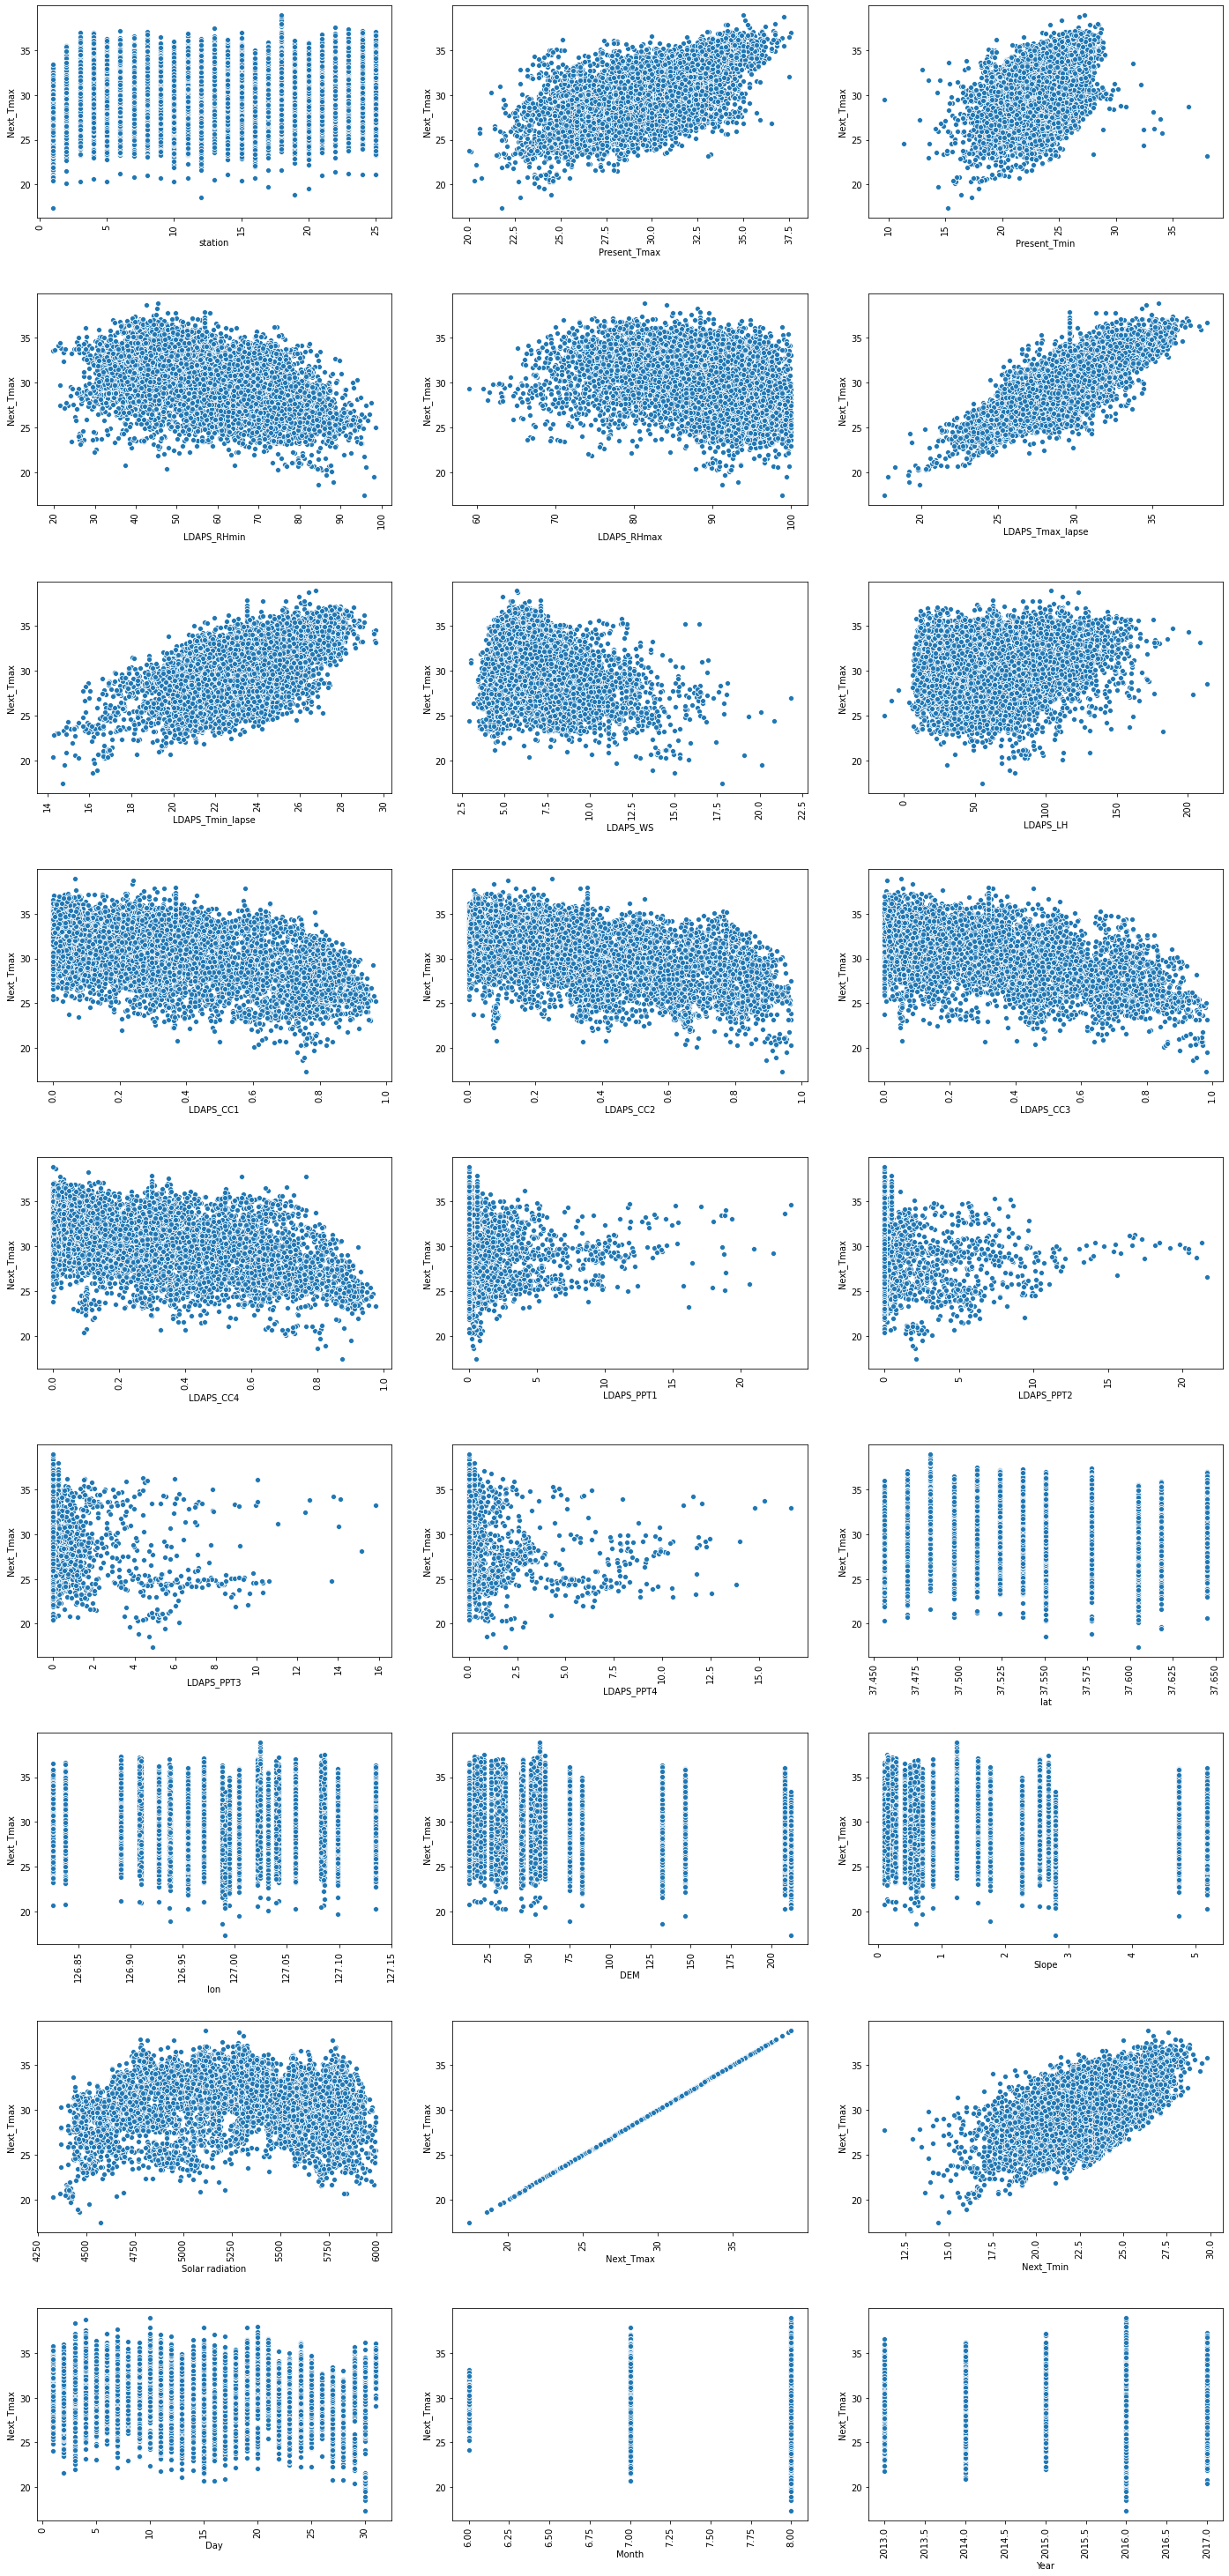

In [257]:
#Checking impact of columns on Max tempratures

c=1
plt.figure(figsize=(20,45))

for i in df.columns:
    plt.subplot(10,3,c)
    sns.scatterplot(x = df[i], y = df['Next_Tmax'])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()


### Observations

We observe positive linear relationships between Next_Tmax and below mentioned columns -
- Present_Tmax
- Present_Tmix
- LDAPS_Tmax_lapse
- LDAPS_Tmin_lapse
- Next_Tmin


Negative relationship is observed with Next_Tmax and -
- LDAPS_Rhmin
- LDAPS_Rhmax
- LDAPS_WS
- LDAPS_CC1
- LDAPS_CC2
- LDAPS_CC3
- LDAPS_CC4

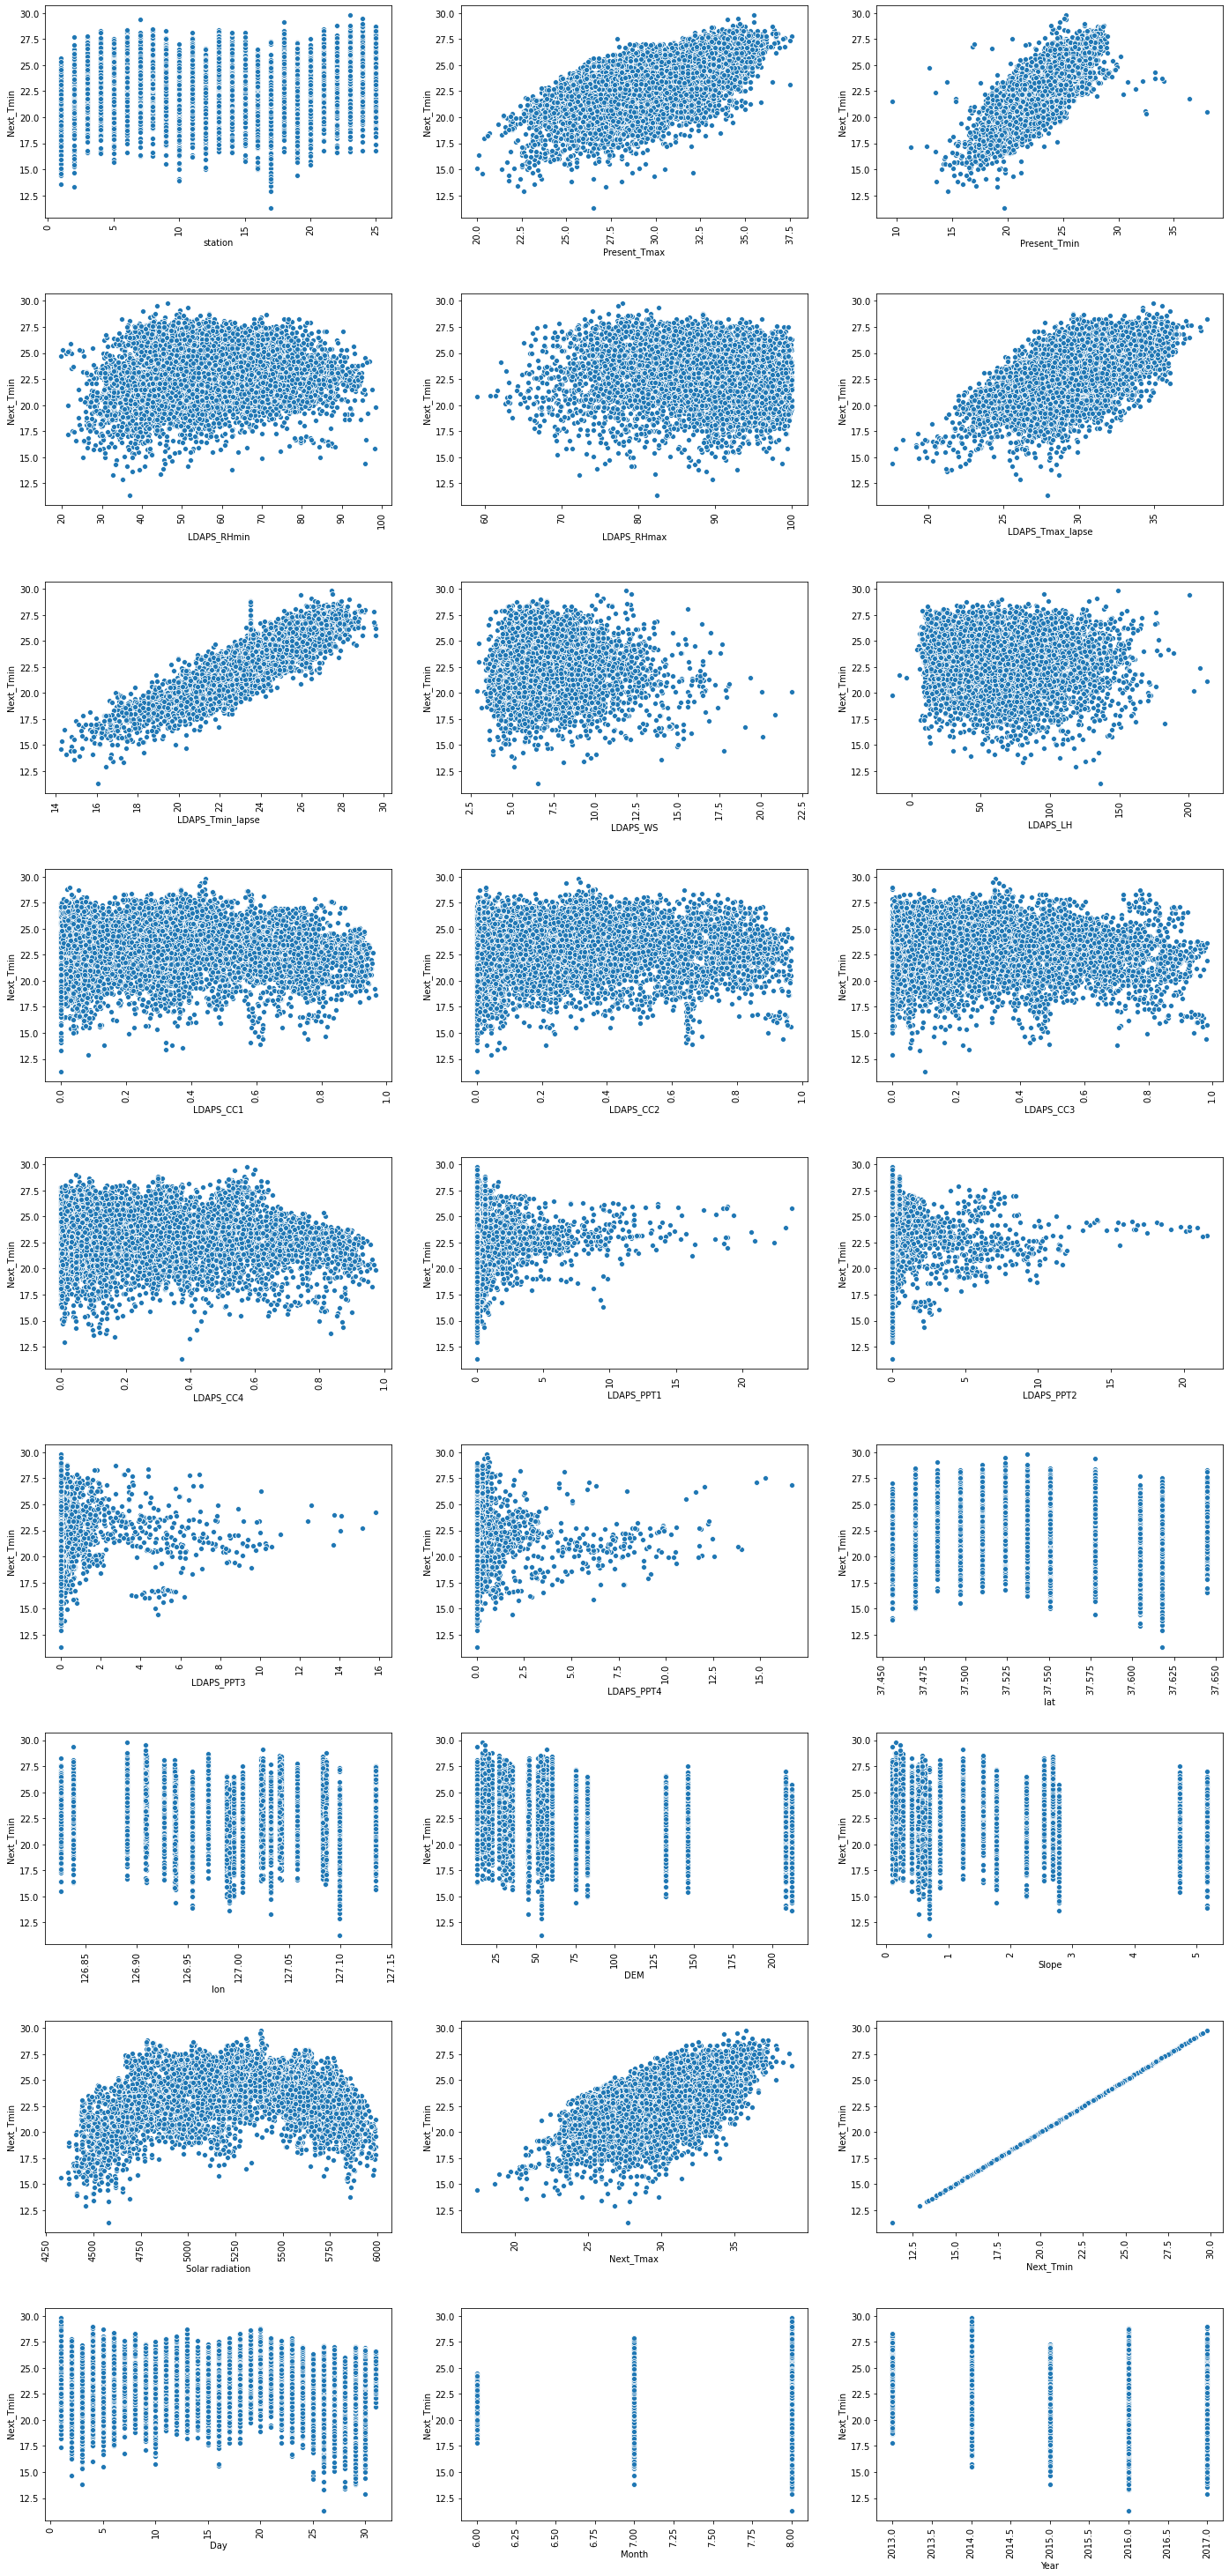

In [258]:
#Checking impact of columns on Min tempratures

c=1
plt.figure(figsize=(20,45))

for i in df.columns:
    plt.subplot(10,3,c)
    sns.scatterplot(x = df[i], y = df['Next_Tmin'])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()


### Observations

We observe positive linear relationships between Next_Tmin and below mentioned columns -
- Present_Tmax
- Present_Tmix
- LDAPS_Tmax_lapse
- LDAPS_Tmin_lapse
- Next_Tmax


Negative relationship is observed with Next_Tmin and -
- LDAPS_Rhmin


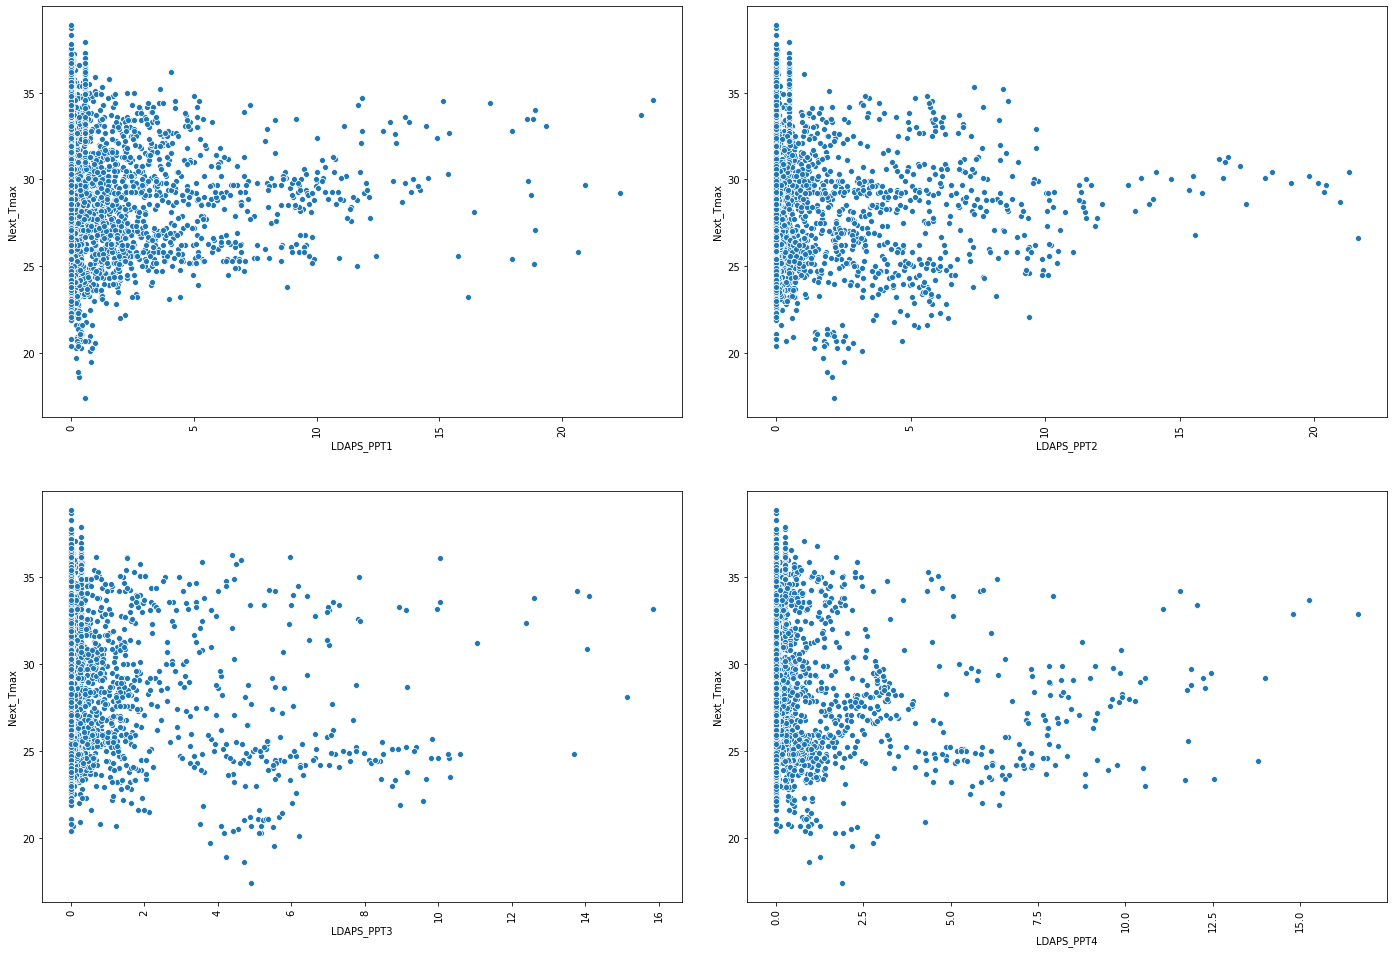

In [259]:
# Comparing LDAPS_PPT columns with Next_Tmax as we see a scattered relationship

c=1
plt.figure(figsize=(20,20))

for i in ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']:
    plt.subplot(3,2,c)
    sns.scatterplot(x = df[i], y = df['Next_Tmax'])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Observations

- As the LDAPS_PPT values increase, the range of temprature decreases.
- This behavior is majorly seen in LDAPS_PPT2, where the range stays confined between 26-31 when LDAPS_PPT2 goes up between 10-20

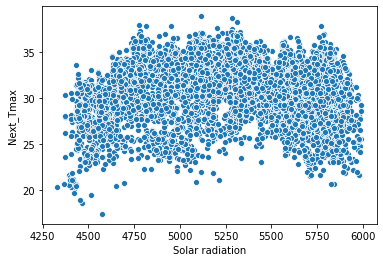

In [260]:
#Comparing Next_Tmax with solar radiation

sns.scatterplot(x = df['Solar radiation'], y = df['Next_Tmax'])

### Observation

When the solar radiation is between 4700 - 5500, the temprature ranges between 23 - 35+.

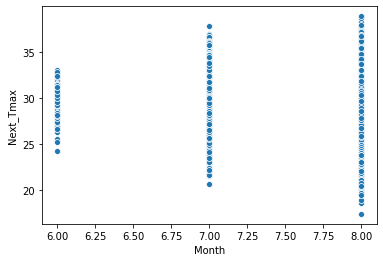

In [261]:
#Comparing Next_Tmax with Months

sns.scatterplot(x = df['Month'], y = df['Next_Tmax'])

### Observation

Max Temperature range in -

- June - 24 - 33 degrees
- July - 21 - 38 degrees
- August - <20 - >40 degrees

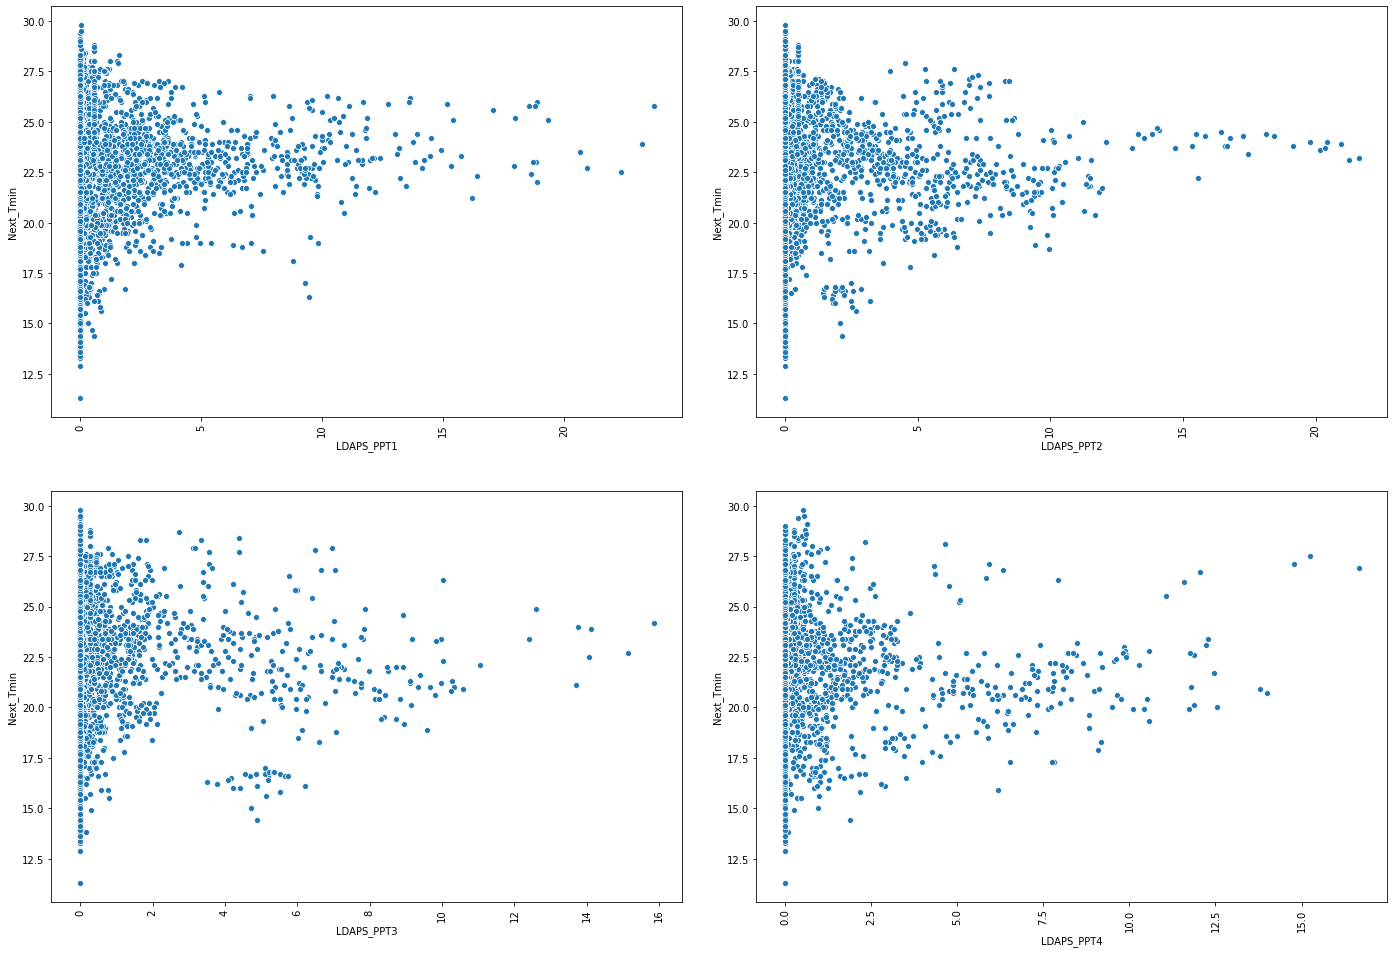

In [262]:
# Comparing LDAPS_PPT columns with Next_Tmax as we see a scattered relationship

c=1
plt.figure(figsize=(20,20))

for i in ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']:
    plt.subplot(3,2,c)
    sns.scatterplot(x = df[i], y = df['Next_Tmin'])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Observations

- As the LDAPS_PPT values increase, the range of temprature decreases.
- This behavior is majorly seen in LDAPS_PPT2, where the range stays confined between 22.5-25 when LDAPS_PPT2 goes up between 10-20

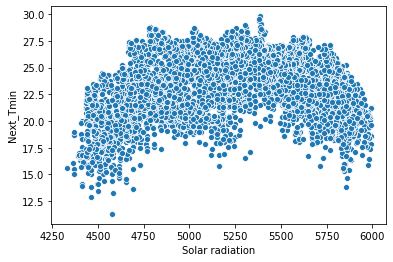

In [263]:
#Comparing Next_Tmin with solar radiation

sns.scatterplot(x = df['Solar radiation'], y = df['Next_Tmin'])

### Observation

When the solar radiation is between 4700 - 5600, the temprature ranges between 217.5 - 30.

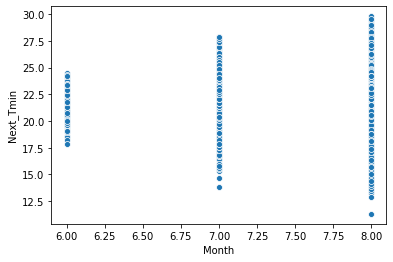

In [264]:
#Comparing Next_Tmin with Months

sns.scatterplot(x = df['Month'], y = df['Next_Tmin'])

### Observation

Min Temperature range in -

- June - 17.5 - 24 degrees
- July - 13 - 28 degrees
- August - <12.5 - >30 degrees

# Outlier detection

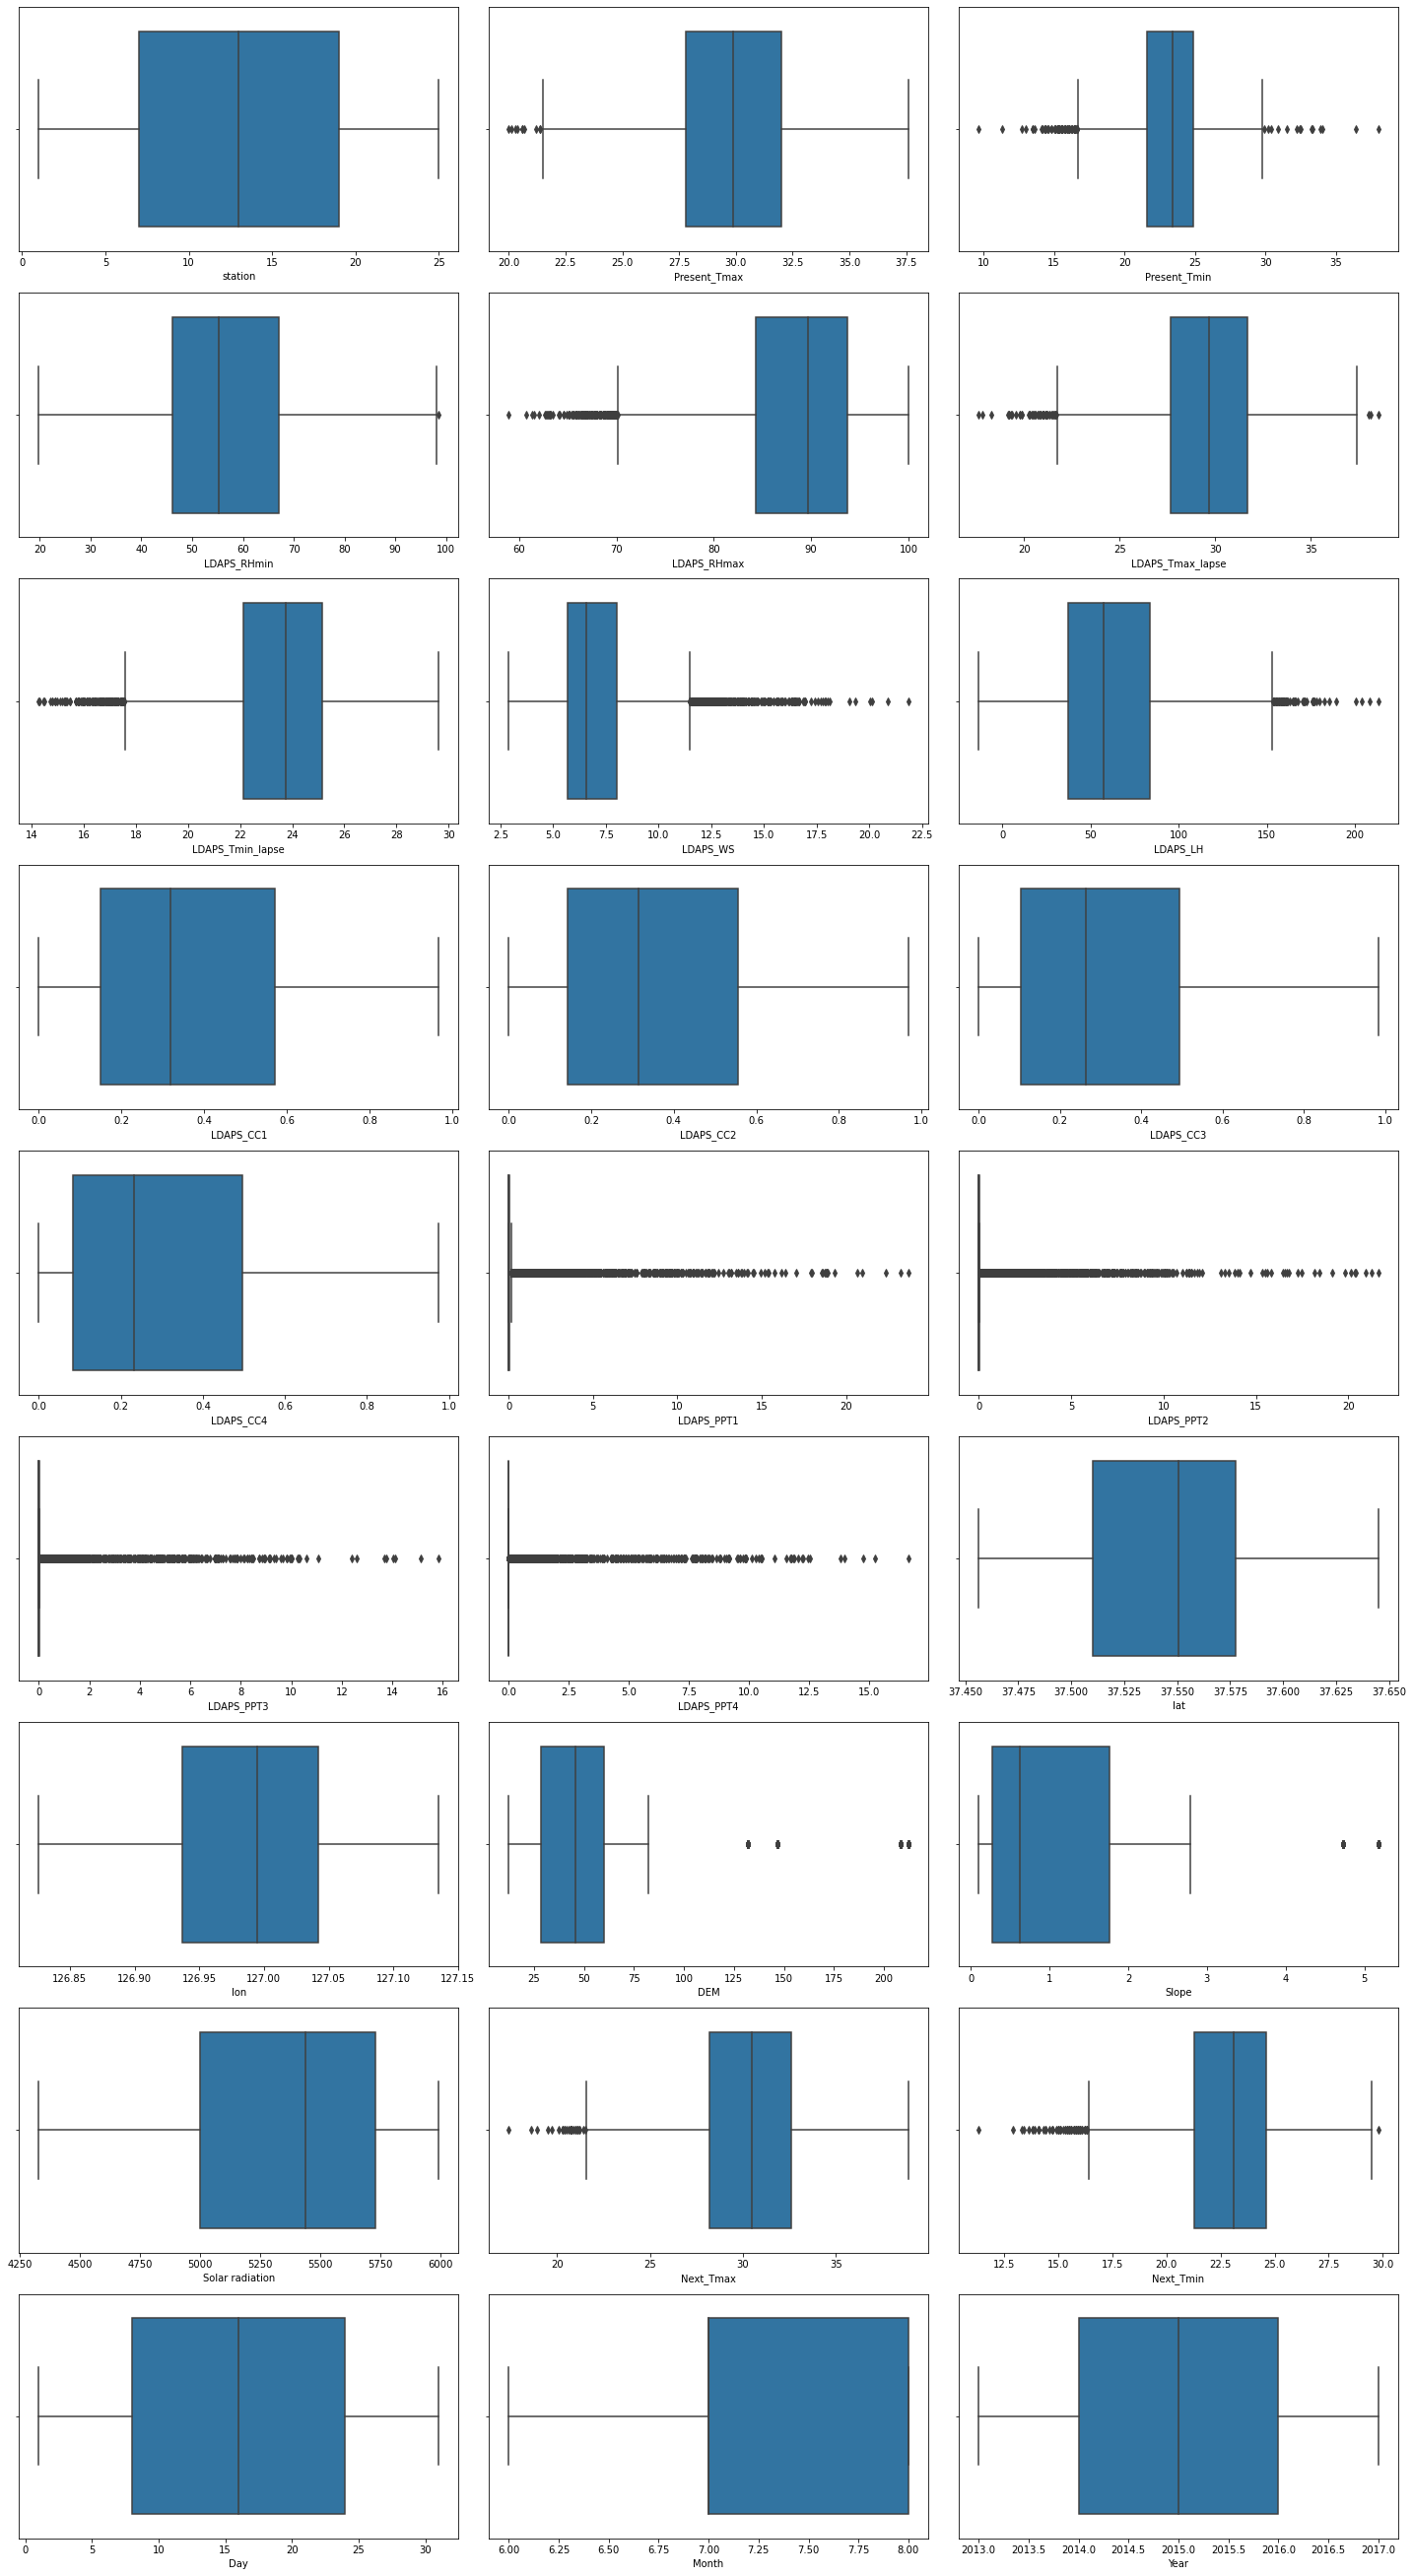

In [265]:
# Plotting boxplot to check outliers

c=1
plt.figure(figsize=(20,40))

for i in df.columns:
    plt.subplot(10,3,c)
    sns.boxplot(df[i])
    plt.tight_layout(pad = 1.0)
    c=c+1
plt.show()

### Observation

- Outliers observed in 
- Present Tmax
- Present_Tmin
- LDAPS_RHmax
- LDAPS_Tmax_lapse
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS-LH
- LDAPS-PPT1
- LDAPS-PPT2
- LDAPS-PPT3
- LDAPS-PPT4
- DEM
- Slope


In [266]:
from scipy.stats import zscore

In [267]:
zs = zscore(df.drop(['Next_Tmax','Next_Tmin'], axis = 1))

In [268]:
data = df[((abs(zs)<3).all(axis=1))] #By running this command, we are checking for data which does not contain outliers

In [269]:
data

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  Day  Month  Year  
0          29.1       21.2   30      6  2013  
1          30.5       22.5   30      6  2013  
2          31.1       23.9   30      6  2013  
3          31.7       24.3   30      6  2013  
4          31.2       22.5   30      6  2013  
...         ...        ...  ...    ...   ...  
7745       27.6       17.7   30      8  2017  
7746       28.

### Observation

If we drop the outliers, we will be dropping around 1% data.

We also observe that the data categorized as outlier is in the range of attributes provided to us, and hence is not incorrect.
If we drop this data, we will drop the values with higher ranges, hence we will not drop these values and train our model along with these values.

## Skewness Treatment

In [270]:
df.skew()

station            -0.002773
Present_Tmax       -0.264239
Present_Tmin       -0.277050
LDAPS_RHmin         0.303007
LDAPS_RHmax        -0.849748
LDAPS_Tmax_lapse   -0.223741
LDAPS_Tmin_lapse   -0.577901
LDAPS_WS            1.558561
LDAPS_LH            0.666843
LDAPS_CC1           0.460320
LDAPS_CC2           0.474865
LDAPS_CC3           0.641606
LDAPS_CC4           0.665639
LDAPS_PPT1          5.329754
LDAPS_PPT2          5.720536
LDAPS_PPT3          6.379510
LDAPS_PPT4          6.751501
lat                 0.086467
lon                -0.286647
DEM                 1.721745
Slope               1.560876
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
Day                -0.008981
Month              -0.193597
Year                0.002105
dtype: float64

Following columns require treatment

- LDAPS-WS
- LDAPS-PPT1
- LDAPS-PPT2
- LDAPS-PPT3
- LDAPS-PPT4
- DEM
- Slope


In [271]:
df[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']].describe()


LDAPS_WS   LDAPS_PPT1   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4  \
count  7723.000000  7723.000000  7723.000000  7723.000000  7723.000000   
mean      7.095360     0.588740     0.481598     0.275122     0.267333   
std       2.165080     1.918604     1.736231     1.138909     1.185557   
min       2.882580     0.000000     0.000000     0.000000     0.000000   
25%       5.686500     0.000000     0.000000     0.000000     0.000000   
50%       6.564141     0.000000     0.000000     0.000000     0.000000   
75%       7.996720     0.067101     0.024025     0.009648     0.000696   
max      21.857621    23.701544    21.621661    15.841235    16.655469   

               DEM        Slope  
count  7723.000000  7723.000000  
mean     61.913798     1.258368  
std      54.308844     1.370719  
min      12.370000     0.098500  
25%      28.700000     0.271300  
50%      45.716000     0.618000  
75%      59.832400     1.767800  
max     212.335000     5.178200

Transforming using cbrt transform since logtransform and boxcox will not work on columns with 0 values

We achieve decent skewness after applying cbrt 4 times

In [272]:
for i in ['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']:
    df[i] = np.cbrt(np.cbrt(np.cbrt(np.cbrt(df[i]))))

In [273]:
df[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']].skew()

LDAPS_WS      0.586659
LDAPS_PPT1    0.523629
LDAPS_PPT2    0.704092
LDAPS_PPT3    0.792848
LDAPS_PPT4    1.109957
DEM           0.429922
Slope         0.083411
dtype: float64

Skewness is now treated successfully

# Scaling the data using Standard Scaler

In [274]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [275]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = df.drop(['Next_Tmax','Next_Tmin'], axis = 'columns')

In [276]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

We have successfully scaled the data

# Fitting the regression models

In [277]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [278]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

dt1 = DecisionTreeRegressor()
svr1 = SVR()
knn1 = KNeighborsRegressor()
lr1 = LinearRegression()

In [279]:
y = df['Next_Tmax']
z = df['Next_Tmin']

In [280]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

SVR()
R2 score is  0.8837615109694378
R2 for train data 0.9038567855988952
Mean absolute error is  0.7828567505196755
Mean squared error is  1.1191154286719933
Root mean squared error is  1.0578825212054472
------------------------------------------
KNeighborsRegressor()
R2 score is  0.8767219623729039
R2 for train data 0.9166703068112222
Mean absolute error is  0.8196547259387139
Mean squared error is  1.186890461804057
Root mean squared error is  1.0894450246818592
------------------------------------------
LinearRegression()
R2 score is  0.7722970317167799
R2 for train data 0.7709292937429569
Mean absolute error is  1.1215780403944797
Mean squared error is  2.1922678717301696
Root mean squared error is  1.4806309032740637
------------------------------------------


### Observaton

SVR provides us the best results with 88% r2 score and 0.7 mean absolute error.

In [281]:
x_train, x_test, z_train, z_test = train_test_split(x,z, test_size = 0.3, random_state = 42)
for i in [dt1, svr1, knn1, lr1]:
    i.fit(x_train, z_train)
    pred = i.predict(x_test)
    test_score = r2_score(z_test, pred)
    train_score = r2_score(z_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(z_test, pred))
        print('R2 for train data', r2_score(z_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(z_test, pred))
        print('Mean squared error is ', mean_squared_error(z_test, pred))
        print('Root mean squared error is ',(mean_squared_error(z_test, pred, squared=False)))
        print('------------------------------------------')

SVR()
R2 score is  0.9083016111834987
R2 for train data 0.9336125947721772
Mean absolute error is  0.5566432817014186
Mean squared error is  0.5431081825403108
Root mean squared error is  0.73695873869594
------------------------------------------
KNeighborsRegressor()
R2 score is  0.8652713590531979
R2 for train data 0.9148129636533912
Mean absolute error is  0.6927924039706517
Mean squared error is  0.7979663357790245
Root mean squared error is  0.893289614726951
------------------------------------------
LinearRegression()
R2 score is  0.8299783166054409
R2 for train data 0.8253297052376342
Mean absolute error is  0.7799170459302758
Mean squared error is  1.0069987995715628
Root mean squared error is  1.0034932982195561
------------------------------------------


### Observaton

SVR provides us the best results with 90% r2 score and 0.5 mean absolute error.

# Ensemble techniques

In [282]:
#Importing the random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [283]:
rfr = RandomForestRegressor()
rfr1 = RandomForestRegressor()

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =42)
for i in [rfr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

RandomForestRegressor()
R2 score is  0.9090140488283385
R2 for train data 0.9872043769304664
Mean absolute error is  0.7002809667673714
Mean squared error is  0.8759902386706944
Root mean squared error is  0.9359435018582555
------------------------------------------


In [285]:
x_train, x_test, z_train, z_test = train_test_split(x,z, test_size = 0.3, random_state = 42)
for i in [rfr1]:
    i.fit(x_train, z_train)
    pred = i.predict(x_test)
    test_score = r2_score(z_test, pred)
    train_score = r2_score(z_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(z_test, pred))
        print('R2 for train data', r2_score(z_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(z_test, pred))
        print('Mean squared error is ', mean_squared_error(z_test, pred))
        print('Root mean squared error is ',(mean_squared_error(z_test, pred, squared=False)))
        print('------------------------------------------')

RandomForestRegressor()
R2 score is  0.9069635963964016
R2 for train data 0.9865289364075234
Mean absolute error is  0.565622788088045
Mean squared error is  0.5510329322399654
Root mean squared error is  0.7423159248190526
------------------------------------------


In [286]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [287]:
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

ad1 = AdaBoostRegressor()
gd1 = GradientBoostingRegressor()

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
for i in [ad, gd]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

AdaBoostRegressor()
R2 score is  0.7706538780275969
R2 for train data 0.7875842800352448
Mean absolute error is  1.2052181207561556
Mean squared error is  2.208087749126894
Root mean squared error is  1.485963575975836
------------------------------------------
GradientBoostingRegressor()
R2 score is  0.8612830991458943
R2 for train data 0.8829330453617237
Mean absolute error is  0.899598676988079
Mean squared error is  1.3355320191969813
Root mean squared error is  1.1556522051192484
------------------------------------------


In [289]:
x_train, x_test, z_train, z_test = train_test_split(x,z, test_size = 0.3, random_state = 42)
for i in [ad1,gd1]:
    i.fit(x_train, z_train)
    pred = i.predict(x_test)
    test_score = r2_score(z_test, pred)
    train_score = r2_score(z_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(z_test, pred))
        print('R2 for train data', r2_score(z_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(z_test, pred))
        print('Mean squared error is ', mean_squared_error(z_test, pred))
        print('Root mean squared error is ',(mean_squared_error(z_test, pred, squared=False)))
        print('------------------------------------------')

AdaBoostRegressor()
R2 score is  0.8143680107194546
R2 for train data 0.8190766402558202
Mean absolute error is  0.8373404188893677
Mean squared error is  1.0994550026527516
Root mean squared error is  1.0485489986894994
------------------------------------------
GradientBoostingRegressor()
R2 score is  0.8894059266802621
R2 for train data 0.9091726356679337
Mean absolute error is  0.6354702669924969
Mean squared error is  0.655022917366723
Root mean squared error is  0.8093348610845347
------------------------------------------


### Observation

Random forest regressor provides us an r2 score of 90% in both cases, but is showing overfitting on the data.

The mean absolute error for SVR and Random forest is at a difference of 0.1, same for RMSE and MSE as well.
We will tune the Rfr model to further check how our model fits to the data

# Cross validation

In [290]:
from sklearn.model_selection import cross_val_score

In [291]:
for i in range(2,9):
    cv = cross_val_score(rfr, x, y, cv=i, scoring = 'r2')
    print(rfr, cv.mean())

RandomForestRegressor() 0.6380028397568027
RandomForestRegressor() 0.6946268280388296
RandomForestRegressor() 0.6851847973561005
RandomForestRegressor() 0.6898744330737481
RandomForestRegressor() 0.6822595628604994
RandomForestRegressor() 0.6860780564831869
RandomForestRegressor() 0.6763458586288412


### Observation

The cross validation gives out the score of ~68%, which means the model is overfitting on the data, and needs to be tuned with the best params.

In [292]:
for i in range(2,9):
    cv = cross_val_score(rfr1, x, z, cv=i, scoring = 'r2')
    print(rfr1, cv.mean())

RandomForestRegressor() 0.7906797076114236
RandomForestRegressor() 0.7675903049974199
RandomForestRegressor() 0.7828952313974078
RandomForestRegressor() 0.7750476825235346
RandomForestRegressor() 0.755939157371306
RandomForestRegressor() 0.7606398051661868
RandomForestRegressor() 0.7668726736495308


### Observation

The cross validation gives out the score of ~76%, which means the model is overfitting on the data, and needs to be tuned with the best params.

# Hypertuning the best model

In [293]:
from sklearn.model_selection import GridSearchCV

In [294]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [295]:
rfr1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [296]:
param_grid = {'n_estimators':[10, 30, 50, 70, 100], 'max_depth':[None,1,2,3], 'max_samples' : [50,100,250,500,1000], 'min_samples_split':[2,4,10]}

gcv_rfr = GridSearchCV(rfr,param_grid, cv=3)
gcv_rfr1 = GridSearchCV(rfr1,param_grid, cv=3)

In [297]:
#Fitting the model

res = gcv_rfr.fit(x_train,y_train)
res1 = gcv_rfr1.fit(x_train,z_train)

In [298]:
#Checking best params

res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 100}

In [299]:
#Checking best params

res1.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 70}

In [300]:
res.best_score_

0.8565374078905338

In [301]:
res1.best_score_

0.8745460160700094

# Saving the tuned models

In [302]:
rfr_maxtemp_final = RandomForestRegressor(max_depth=None, max_samples=1000, min_samples_split=2, n_estimators=70)

In [303]:
rfr_mintemp_final = RandomForestRegressor(max_depth=None, max_samples=1000, min_samples_split=2, n_estimators=100)

In [304]:
rfr_maxtemp_final.fit(x_train, y_train)
rfr_mintemp_final.fit(x_train, z_train)

RandomForestRegressor(max_samples=1000)

In [305]:
pred_max = rfr_maxtemp_final.predict(x_test)

In [306]:
pred_min = rfr_mintemp_final.predict(x_test)

In [307]:
# Predicting Next_Tmax

print('R2 score for test data is ',r2_score(y_test, pred_max))
print('R2 for train data', r2_score(y_train,rfr_maxtemp_final.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred_max))
print('Mean squared error is ', mean_squared_error(y_test, pred_max))
print('Root mean squared error is ',(mean_squared_error(y_test, pred_max, squared=False)))

R2 score for test data is  0.8588444325489973
R2 for train data 0.9012602881040295
Mean absolute error is  0.8964923854738269
Mean squared error is  1.3590108981529598
Root mean squared error is  1.1657662279174843


In [308]:
# Predicting Next_Tmin

print('R2 score for test data is ',r2_score(z_test, pred_min))
print('R2 for train data', r2_score(z_train,rfr_mintemp_final.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(z_test, pred_min))
print('Mean squared error is ', mean_squared_error(z_test, pred_min))
print('Root mean squared error is ',(mean_squared_error(z_test, pred_min, squared=False)))

R2 score for test data is  0.8770487981190828
R2 for train data 0.9148490683633912
Mean absolute error is  0.6604186447993097
Mean squared error is  0.7282113094518777
Root mean squared error is  0.8533529805724462


# Saving the models using Joblib

In [309]:
import joblib

In [310]:
joblib.dump(rfr_maxtemp_final, 'Next_Tmax_temp_prediction.obj')
joblib.dump(rfr_mintemp_final, 'Next_Tmin_temp_prediction.obj')

['Next_Tmin_temp_prediction.obj']

# Conclusion

We were able to train the 2 models to predict minimum and maximum temperatures for next day with an r2score of 87 and 85%.

We obtained a mean_absolute error of around 0.6 for min temperature and 0.8 for max temperature.
The RMSE scores for min were around 0.85 and for max around 1.1
The MSE score for min is around 0.7 and for max is around 1.3

The predictions are quite close to the actual data and hence our model has learnt well.

In [311]:
max_model = joblib.load('Next_Tmax_temp_prediction.obj')
min_model = joblib.load('Next_Tmin_temp_prediction.obj')

In [312]:
max_temp = max_model.predict(x_test)

In [313]:
min_temp = min_model.predict(x_test)

In [314]:
#Creating a dataframe with actual and predicted values

minimum_temperature = pd.DataFrame({'Actual':z_test,'Predicted':min_temp})
maximum_temperature = pd.DataFrame({'Actual':y_test,'Predicted':max_temp})

In [315]:
minimum_temperature

Actual  Predicted
4300    21.7     20.593
2340    22.5     23.667
2970    21.8     22.419
1106    26.2     25.664
6330    24.3     24.137
...      ...        ...
6740    25.9     25.886
7267    23.1     23.413
4327    24.3     23.526
5995    26.6     25.684
6763    26.1     26.267

[2317 rows x 2 columns]

In [316]:
maximum_temperature

Actual  Predicted
4300    30.2  30.488571
2340    33.2  33.200000
2970    29.5  30.370000
1106    32.6  32.840000
6330    35.0  34.315714
...      ...        ...
6740    32.2  31.137143
7267    31.9  31.738571
4327    30.1  30.294286
5995    31.9  33.844286
6763    28.2  29.488571

[2317 rows x 2 columns]

In [317]:
#Our task is done